# Module 2--Downloading data


- Module 1 covers python basics
    - Notes (Current page)
    - Youtube video

# 1. Importing Data
- All data and code for this course including this notebook is viewable on our course page below
    - https://github.com/Data-Science-Public-Policy/graspp_2025_spring/tree/main

## 1.1. Importing data from github

1. Find a cool data set and click right click and copy link from the raw button


<img src="screenshots/github_import_raw.png" />



In [30]:
# THE URL SHOULD HAVE THE /raw/ somewhere
url = "https://github.com/Data-Science-Public-Policy/graspp_2025_spring/raw/refs/heads/module_1/data/examples/module_1/world_bank_data.csv"
# This line prints the url
url

'https://github.com/Data-Science-Public-Policy/graspp_2025_spring/raw/refs/heads/module_1/data/examples/module_1/world_bank_data.csv'

### 1.1.1 Importing example data from our class

In [3]:
# This line uses the pandas library's 'read_csv' function.
import pandas as pd
df = pd.read_csv(url)
# The 'head(2)' returns the first 2 rows of the DataFrame.
df.head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


### 1.1.2 Global Macro Data Base

- This is an amazing resource with macrodata from many different sources
    - https://github.com/KMueller-Lab/Global-Macro-Database/tree/main 

In [4]:
url = 'https://github.com/KMueller-Lab/Global-Macro-Database/raw/refs/heads/main/data/final/chainlinked_infl.dta'
df = pd.read_stata(url)
df.head(2)

,ISO3,year,ADB_infl,AHSTAT_infl,AMF_infl,BCEAO_infl,BIS_infl,BORDO_infl,CEPAC_infl,EUS_infl,...,OECD_KEI_infl,WB_CC_infl,WDI_infl,WDI_ARC_infl,CS1_infl,CS2_infl,infl,chainlinking_ratio,source,source_change
0,ZWE,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.131044,1.0,IMF_WEO,NaN
1,ZWE,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.108963,1.0,IMF_WEO,NaN


## 1.2 Importing directly from wikipedia

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_cities'
df = pd.read_html(url)
df[1].head(2)

City[a] Country UN 2018 population estimates[b]         City proper[c]  \
  City[a] Country UN 2018 population estimates[b]             Definition   
0   Tokyo   Japan                        37468000  Metropolis prefecture   
1   Delhi   India                        28514000  Municipal corporation   

                                       Urban area[12]             \
  Population Area (km2) Density (/km2)     Population Area (km2)   
0   13515271       2191     6,169 [13]       37785000       8231   
1   16753235       1484    11,289 [15]       32226000       2344   

                 Metropolitan area[d]                            
  Density (/km2)           Population Area (km2) Density (/km2)  
0      4,591 [e]             37274000      13452     2,771 [14]  
1     13,748 [f]             29000000       3483     8,326 [16]

In [18]:
url = 'https://en.wikipedia.org/wiki/2024_Japanese_general_election'
tables = pd.read_html(url)
df = tables[6]
df

Parties                                                      Leader  \
  Parties                                 Parties.1            Leader   
0     NaN                  Liberal Democratic Party    Shigeru Ishiba   
1     NaN  Constitutional Democratic Party of Japan    Yoshihiko Noda   
2     NaN                    Japan Innovation Party     Nobuyuki Baba   
3     NaN                                   Komeito     Keiichi Ishii   
4     NaN                  Japanese Communist Party     Tomoko Tamura   
5     NaN           Democratic Party For the People   Yuichiro Tamaki   
6     NaN                         Reiwa Shinsengumi     Tarō Yamamoto   
7     NaN                   Social Democratic Party  Mizuho Fukushima   
8     NaN                                  Sanseitō      Sohei Kamiya   
9     NaN                    Nonpartisan and others                 —   

                                  Ideology         Seats                     \
                                  Ideology Last election At dissolution[15]   
0        Conservatism Japanese nationalism     259 / 465          247 / 465   
1                               Liberalism      96 / 465           98 / 465   
2  Right-wing populism Economic liberalism      41 / 465           44 / 465   
3                       Buddhist democracy      32 / 465           32 / 465   
4                                Communism      10 / 465           10 / 465   
5                             Conservatism      11 / 465            7 / 465   
6         Progressivism Left-wing populism       3 / 465            3 / 465   
7                         Social democracy       1 / 465            1 / 465   
8   Right-wing populism  Ultraconservatism       0 / 465            1 / 465   
9                                        —      12 / 465           22 / 465   

                Status  
                Status  
0  Governing coalition  
1           Opposition  
2           Opposition  
3  Governing coalition  
4           Opposition  
5           Opposition  
6           Opposition  
7           Opposition  
8           Opposition  
9           Opposition

## 1.3 Importing data from your local computer workspace

In [6]:
df = pd.read_csv("../../../data/examples/module_1/world_bank_data.csv")
df.head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


# 2. Download from API

## 2.1 World bank

#### NO API REQUIRED

In [50]:
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
    url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    return df  # Return the table

In [51]:
# Example 1
data = download_worldbank(
    indicator = 'NY.GDP.PCAP.CD' , 
    countries = ['US', 'CA', 'MX', 'JP'],  
    date_start = '2021', 
    date_end = '2023'
)
data.head(2)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,GDP per capita (current US$),Canada,CAN,2023,53431.185706,NaN,NaN,1
1,GDP per capita (current US$),Canada,CAN,2022,55509.393176,NaN,NaN,1


## 2.2 FRED
### 2.2.A Register for FRED and click on API Keys

<img src="screenshots/fred_api.png" />


### 2.2.1 Import data

In [46]:
import numpy as np
import requests
import json

def fetch_fred_data(api_key, series_id):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&file_type=json&api_key={api_key}"
    response = requests.get(url)
    dictionary = response.json()['observations']
    df = pd.DataFrame(dictionary)[['date','value']]
    df.value = df.value.replace(".", np.nan).astype(float)
    df = df.dropna()
    return df

  
# Example usage
api_key = "6290b1cc11ac06efe031863a31de166f"  # Replace with your actual API key
series_id = "GDP"  # Example series ID for US GDP
    
df = fetch_fred_data(api_key, series_id)
df.head(2)

,date,value
4,1947-01-01,243.164
5,1947-04-01,245.968


<Axes: xlabel='date'>

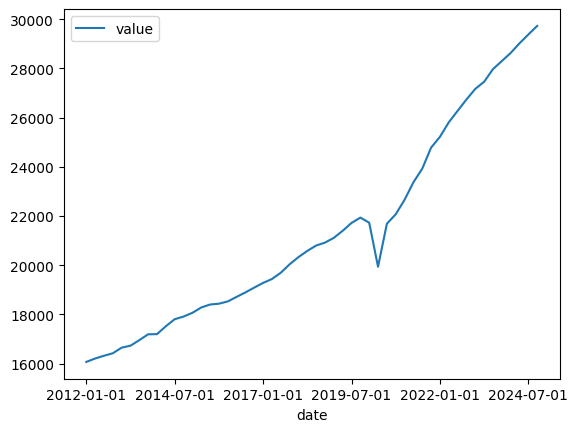

In [49]:
df.set_index('date')['2012':].plot()

# 3. Webscraping

## 3.1 Basic HTML

In [29]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the Federal Reserve's website
url = "https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm"
response = requests.get(url)
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:

# Send a GET request to the statement page
statement_response = requests.get(statement_url)

# Parse the HTML content of the statement page
statement_soup = BeautifulSoup(statement_response.content, 'html.parser')

# Find and print the statement text
statement_text = statement_soup.find('div', class_='summary').get_text()
statement_text

## 1.3 Importing data via an API

### 1.3.A Introducing functions

In [6]:
# We already used functions!

# function to read csvs from the pandas library
# pd.read_csv()
# function to read html from the pandas library
# pd.read_html()

#### 1.3.A.1 Basic function

In [7]:
# Now we make our own
def num_print(a):
    return a

In [8]:
num_print(8)

8

In [9]:
num_print(7)

7

#### 1.3.A.2 Multiple arguments

In [10]:
def add_func(a,b,c):
    print('This function adds')
    final = a+b+c
    return final

In [11]:
add_func(10,20,10)

This function adds


40

### 1.3.1 Function to download data from the world bank WDI

In [12]:
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
    url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    return df  # Return the table

In [13]:
# Example 1
data = download_worldbank(
    indicator = 'NY.GDP.PCAP.CD' , 
    countries = ['US', 'CA', 'MX', 'JP'],  
    date_start = '2021', 
    date_end = '2023'
)
data.head(2)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,GDP per capita (current US$),Canada,CAN,2023,53431.185706,NaN,NaN,1
1,GDP per capita (current US$),Canada,CAN,2022,55509.393176,NaN,NaN,1


In [14]:
# Example 2: Using saved objects
indicator_code = 'SP.POP.TOTL'  # Example: Total population
country_list = ['FR', 'DE', 'IT'] # France, Germany, Italy
start_year = '2020'
end_year = '2022'

data2 = download_worldbank(
    indicator=indicator_code,
    countries=country_list,
    date_start=start_year,
    date_end=end_year
)
data2.head(2)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"Population, total",Germany,DEU,2023,83280000,NaN,NaN,0
1,"Population, total",Germany,DEU,2022,83797985,NaN,NaN,0


# 2. Where is this notebook? Where is my Data? 


### IMPORTANT: If you are running on google colab you need to drag the csv file into your workspace
###

## 2.1 `File path`: fancy way to say the current folder you are working from

### 2.1.A Current folder

In [15]:
# Current path
import os
# os.getcwd(): Shows current folder this notebook is in
os.getcwd()

'/Users/corybaird/Desktop/graspp_2025_spring/notebooks/module_1/week_1'

In [16]:
# This shows the files in the folder three folders above the current folder
os.listdir("../../..")

['.DS_Store',
 'requirements.txt',
 'uv.lock',
 'environment.yml',
 'pyproject.toml',
 'README.md',
 '.gitignore',
 '.venv',
 '.git',
 'data',
 'notebooks',
 'src']

In [17]:
# This shows the files in the data/examples/module_1 folder
os.listdir("../../../data/examples/module_1")

['world_bank_data.csv']

### 2.1.1 Saving data: In this case words (a.k.a. a string)

In [18]:
# In python if you write a name (without spaces) and you write something on the right hand side this saves data/information
file_location = "../../../data/examples/module_1/"
file_location

'../../../data/examples/module_1/'

## 2.2 Importing data (csv, excel, stata) to the notebook

In [19]:
os.listdir(file_location)

['world_bank_data.csv']

### 2.2.1 Import

In [20]:
import pandas as pd
pd.read_csv("../../../data/examples/module_1/world_bank_data.csv")
pd.read_csv(file_location + "world_bank_data.csv") #You can combine words with a +

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176
2,2,GDP per capita (current US$),Canada,CAN,2021,52496.844169
3,3,GDP per capita (current US$),Japan,JPN,2023,33766.526825
4,4,GDP per capita (current US$),Japan,JPN,2022,34017.271808
5,5,GDP per capita (current US$),Japan,JPN,2021,40058.537328
6,6,GDP per capita (current US$),Mexico,MEX,2023,13790.024343
7,7,GDP per capita (current US$),Mexico,MEX,2022,11385.407076
8,8,GDP per capita (current US$),Mexico,MEX,2021,10314.050674
9,9,GDP per capita (current US$),United States,USA,2023,82769.412211


### 2.2.2 Import and save to notebook (same concept as 1.1.1)

In [21]:
# In python if you write a name (without spaces) and you write something on the right hand side this saves data/information
df = pd.read_csv(file_location + "world_bank_data.csv") #You can combine words with a +
df

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176
2,2,GDP per capita (current US$),Canada,CAN,2021,52496.844169
3,3,GDP per capita (current US$),Japan,JPN,2023,33766.526825
4,4,GDP per capita (current US$),Japan,JPN,2022,34017.271808
5,5,GDP per capita (current US$),Japan,JPN,2021,40058.537328
6,6,GDP per capita (current US$),Mexico,MEX,2023,13790.024343
7,7,GDP per capita (current US$),Mexico,MEX,2022,11385.407076
8,8,GDP per capita (current US$),Mexico,MEX,2021,10314.050674
9,9,GDP per capita (current US$),United States,USA,2023,82769.412211


# A. The" boring stuff: explaining what we just did 

## A. Note for R-users

- Python is in many ways similiar to R

- Comment code: #
- Some functions are exactly the same: print()
- Saving an object requires you to write a name and set it equal to whatever object you are interested in saving
- You must run the code in the correct order
- We use libraries!

In [22]:
# REMEMBER THIS IS WHAT WE USED BEFORE
# This line saves the web address (URL) of the World Bank data file as text in a variable named 'url'.
url = "https://github.com/Data-Science-Public-Policy/graspp_2025_spring/raw/refs/heads/module_1/data/examples/module_1/world_bank_data.csv"

In [23]:
# This is a comment
print('This is a print function')

This is a print function


In [24]:
saved_object = 'hello world'
print(saved_object)

hello world


In [25]:
saved_object = 'GRASPP IS COOL'
saved_object

'GRASPP IS COOL'

## A.1 Strings

- Think of it as a piece data that has quotes
- R-users: This is the same as in R!


In [26]:
my_str = 'Python is cool'
print(my_str)

Python is cool


### A.1.1 This function can tell us what type our object is

In [27]:
type(my_str)

str

### A.1.2 Overwriting

In [28]:
my_str = 'Python is NOT cool'
my_str

'Python is NOT cool'

## A.2 Integers/Float

In [29]:
my_num = 100
type(my_num)

int

In [30]:
my_num = 100.9483859390942949
type(my_num)

float

## A.2 Lists

- Lists can be made up of strings or numbers
- Spacing is not necessarily important!

In [31]:
# REMEMBER WE USED LISTS BEFORE
# Example 2: Using saved objects
indicator_code = 'SP.POP.TOTL'  # Example: Total population
country_list = ['FR', 'DE', 'IT'] # France, Germany, Italy
start_year = '2020'
end_year = '2022'

data2 = download_worldbank(
    indicator=indicator_code,
    countries=country_list,
    date_start=start_year,
    date_end=end_year
)
data2.head(2)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"Population, total",Germany,DEU,2023,83280000,NaN,NaN,0
1,"Population, total",Germany,DEU,2022,83797985,NaN,NaN,0


In [32]:
my_list = ['Python', 'R', 'Stata', 'Excel']

my_list

['Python', 'R', 'Stata', 'Excel']

In [33]:
my_list = [3, 
           5,
           9,
           11]
type(my_list)

list

## A.3 Dictionaries

In [34]:
rename_country_map = {
    "Canada": "Canada",
    "Mexico": "United Mexican States",
    "United States": "United States of America",
    "Germany": "Federal Republic of Germany",
}

In [35]:
rename_country_map.values()

dict_values(['Canada', 'United Mexican States', 'United States of America', 'Federal Republic of Germany'])

In [36]:
rename_country_map.keys()

dict_keys(['Canada', 'Mexico', 'United States', 'Germany'])

# B. Introduction to Pandas

### For R users: Pandas is similar to DPLYR!

In general we use it to:

- Manipulate data (Today's topic)
- Viusualize our data (graphing etc.)
- Download data directly from the internet
- Build models (Regression, Machine learning, Neural Networks)

## B.A We must import the library before using!
- Again this is similar to R
- However unlike R: in order to use the functions (in general) we have to use an acronym to access the functions

In [37]:
import pandas as pd

## B.1 Import data
- pd.read_stata
- pd.read_csv
- pd.read_excel

In [38]:
url = "https://github.com/Data-Science-Public-Policy/graspp_2025_spring/raw/refs/heads/module_1/data/examples/module_1/world_bank_data.csv"
df = pd.read_csv(url)

In [39]:
type(df)

pandas.core.frame.DataFrame

# B.2 Basics


### B.2.1 Info

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12 non-null     int64  
 1   indicator        12 non-null     object 
 2   country          12 non-null     object 
 3   countryiso3code  12 non-null     object 
 4   date             12 non-null     int64  
 5   value            12 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 708.0+ bytes


### B.2.2 Head, tail


In [41]:
df.head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


In [42]:
df.tail(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
10,10,GDP per capita (current US$),United States,USA,2022,78035.175360
11,11,GDP per capita (current US$),United States,USA,2021,71318.307359


## B.2.3 Descriptive stats

In [43]:
df.describe()

,Unnamed: 0,date,value
count,12.000000,12.000000,12.000000
mean,5.500000,2022.000000,44741.011336
std,3.605551,0.852803,25272.662972
min,0.000000,2021.000000,10314.050674
25%,2.750000,2021.000000,28772.401205
50%,5.500000,2022.000000,46277.690748
75%,8.250000,2023.000000,59461.621722
max,11.000000,2023.000000,82769.412211


## B.2.4 Column names

In [44]:
 df.columns

Index(['Unnamed: 0', 'indicator', 'country', 'countryiso3code', 'date',
       'value'],
      dtype='object')

In [45]:
columns = df.columns

#### Manipulating lists

In [46]:
# The second element to the third element
columns[1:3] # Second element in slice is not inclusive

Index(['indicator', 'country'], dtype='object')

In [47]:
# Indexing starts at zero
columns[0:2]

Index(['Unnamed: 0', 'indicator'], dtype='object')

In [48]:
columns[-2:]

Index(['date', 'value'], dtype='object')

## B.3 Select and Filter

### B.3.1 Select column

In [49]:
df['country'].head(2)

0    Canada
1    Canada
Name: country, dtype: object

In [50]:
df.country.head(2)

0    Canada
1    Canada
Name: country, dtype: object

## B.3.2 Subset Rows

<img src="Screenshots/subset_row.svg" />


### B.3.2.1 Show unique values in a column

In [51]:
df.country.unique()

array(['Canada', 'Japan', 'Mexico', 'United States'], dtype=object)

#### B.3.2.2 Select Row

In [52]:
df.query("country == 'Japan'")

,Unnamed: 0,indicator,country,countryiso3code,date,value
3,3,GDP per capita (current US$),Japan,JPN,2023,33766.526825
4,4,GDP per capita (current US$),Japan,JPN,2022,34017.271808
5,5,GDP per capita (current US$),Japan,JPN,2021,40058.537328


In [53]:
mask = df.country == 'Japan'
mask[:2]

0    False
1    False
Name: country, dtype: bool

In [54]:
df[mask]
df.loc[mask]

,Unnamed: 0,indicator,country,countryiso3code,date,value
3,3,GDP per capita (current US$),Japan,JPN,2023,33766.526825
4,4,GDP per capita (current US$),Japan,JPN,2022,34017.271808
5,5,GDP per capita (current US$),Japan,JPN,2021,40058.537328


#### B.2.2.3 Subset multiple conditions

In [55]:
df.query("country == 'Japan' & date>2021")

,Unnamed: 0,indicator,country,countryiso3code,date,value
3,3,GDP per capita (current US$),Japan,JPN,2023,33766.526825
4,4,GDP per capita (current US$),Japan,JPN,2022,34017.271808


#### B.3.2.4 Subset in a list

In [56]:
df.query("country in ['Japan', 'Mexico']")

,Unnamed: 0,indicator,country,countryiso3code,date,value
3,3,GDP per capita (current US$),Japan,JPN,2023,33766.526825
4,4,GDP per capita (current US$),Japan,JPN,2022,34017.271808
5,5,GDP per capita (current US$),Japan,JPN,2021,40058.537328
6,6,GDP per capita (current US$),Mexico,MEX,2023,13790.024343
7,7,GDP per capita (current US$),Mexico,MEX,2022,11385.407076
8,8,GDP per capita (current US$),Mexico,MEX,2021,10314.050674


### B.3.2.5 Subset rows and columns

In [57]:
df.query("country in ['Japan', 'Mexico']")[['country', 'date']]

,country,date
3,Japan,2023
4,Japan,2022
5,Japan,2021
6,Mexico,2023
7,Mexico,2022
8,Mexico,2021


## B.3 Rename 

### B.3.1 Rename columns

In [58]:
df.rename({"value" : "GDP"}, axis=1).head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,GDP
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


### B.3.2 Rename rows

In [59]:
rename_country_map = {
    "Canada" : "O CANANDA"
}
df.country.replace(rename_country_map)
df.country.map(rename_country_map)

0     O CANANDA
1     O CANANDA
2     O CANANDA
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
Name: country, dtype: object

## B.4 Apply functions to pandas

### B.4.1 Basics

In [60]:
def basics(data):
    print('Head')
    print(data.head(2))
    print('')
    print('Tail')
    print(data.tail(2))
    print('')
    print('Columns')
    print(data.columns[:3])
    print('')
    print('Info')
    print(data.info())

basics(df)

Head
   Unnamed: 0                     indicator country countryiso3code  date  \
0           0  GDP per capita (current US$)  Canada             CAN  2023   
1           1  GDP per capita (current US$)  Canada             CAN  2022   

          value  
0  53431.185706  
1  55509.393176  

Tail
    Unnamed: 0                     indicator        country countryiso3code  \
10          10  GDP per capita (current US$)  United States             USA   
11          11  GDP per capita (current US$)  United States             USA   

    date         value  
10  2022  78035.175360  
11  2021  71318.307359  

Columns
Index(['Unnamed: 0', 'indicator', 'country'], dtype='object')

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12 non-null     int64  
 1   indicator        12 non-null     object 
 2   country          12 no

### B.4.2 subset

In [61]:
def subset(countries, columns):
    out = df.query(f"country in {countries}")[columns]
    return out
subset(
    countries = ['Japan', 'Mexico'],
    columns = ['country', 'date']
)

,country,date
3,Japan,2023
4,Japan,2022
5,Japan,2021
6,Mexico,2023
7,Mexico,2022
8,Mexico,2021
